In [238]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns

In [239]:
%matplotlib inline

In [240]:
plt.rcParams['figure.figsize'] = (10, 5)

In [241]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [242]:
#importing data
df_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
df_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [243]:
#finding data columns
df_rater.columns



Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [244]:
#finding data type
df_rater.columns


df_rater.dtypes


Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [245]:
#value count of Brands
df_rater["Brand"].value_counts()

Nissin               399
Nongshim             103
Maruchan              81
Myojo                 72
Mama                  71
                    ... 
President              1
La Moderna             1
Tokachimen Koubou      1
Kimura                 1
Westbrae               1
Name: Brand, Length: 369, dtype: int64

In [258]:
df_rater["Country"].value_counts()

Japan            381
United States    340
South Korea      326
Taiwan           229
Thailand         191
China            175
Malaysia         158
Hong Kong        144
Indonesia        141
Singapore        122
Vietnam          108
UK                69
Philippines       47
Canada            41
India             39
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Nigeria            2
Ghana              2
Phlippines         1
Name: Country, dtype: int64

In [246]:
type_ramen= df_rater["Style"].value_counts()

print(type_ramen)

Pack          1594
Bowl           514
Cup            470
Tray           111
Box              6
Restaurant       1
Can              1
Bar              1
Name: Style, dtype: int64


In [247]:
brand = df_rater.groupby('Brand')
brand.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN
...,...,...,...,...,...,...,...
2683,17,Quickchow,Pancit Palabok,Pack,Philippines,2.5,NaN
2690,10,Smack,Vegetable Beef,Pack,United States,1.5,NaN
2691,9,Sutah,Cup Noodle,Cup,South Korea,2,NaN
2692,8,Tung-I,Chinese Beef Instant Rice Noodle,Pack,Taiwan,3,NaN


In [248]:
df_rater.set_index("Review #")
df_rater.head()


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [249]:
df_rater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2700 non-null   int64 
 1   Brand     2700 non-null   object
 2   Variety   2700 non-null   object
 3   Style     2698 non-null   object
 4   Country   2700 non-null   object
 5   Stars     2700 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 147.8+ KB


In [251]:
star_rate = df_rater.drop('Top Ten', axis=1, inplace= True)


In [252]:
star_rate = df_rater.drop('Review #', axis=1, inplace= True)

,Brand,Variety,Style,Country,Stars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


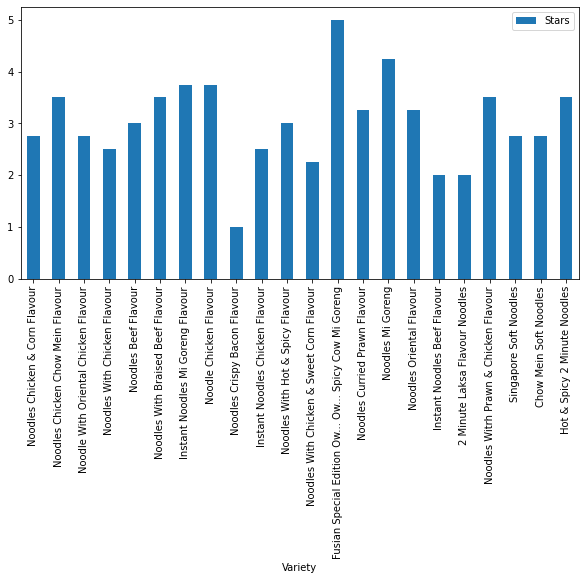

In [253]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Australia"].plot(kind= "bar")
df_rater.head()

,Brand,Variety,Style,Country,Stars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


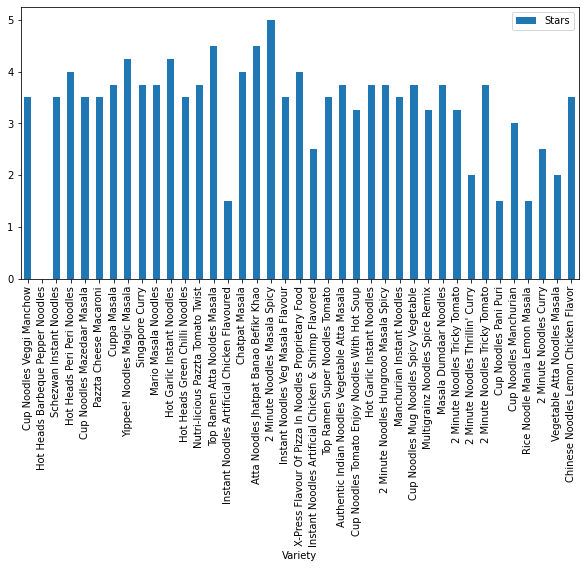

In [263]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "India"].plot(kind= "bar")
df_rater.head()

,Brand,Variety,Style,Country,Stars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


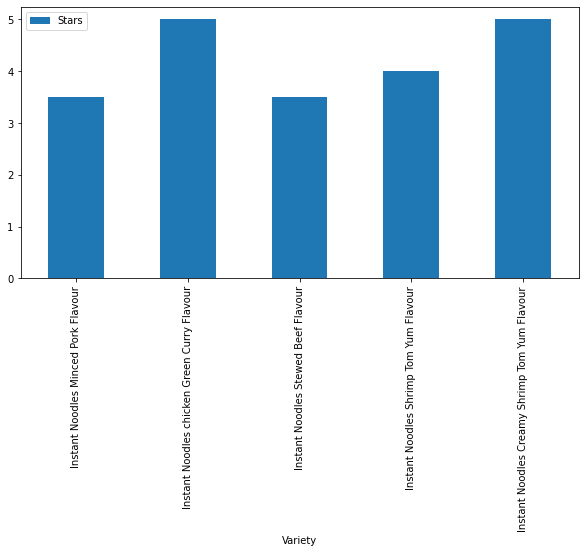

In [259]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Cambodia"].plot(kind= "bar")
df_rater.head()

,Brand,Variety,Style,Country,Stars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


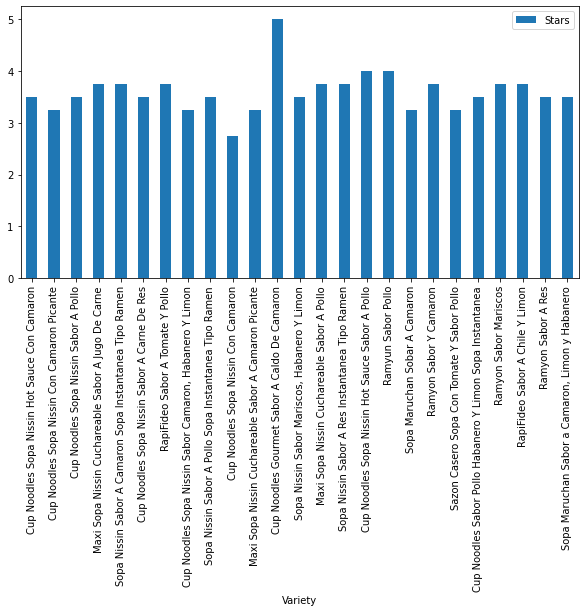

In [261]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Mexico"].plot(kind= "bar")
df_rater.head()

,Brand,Variety,Style,Country,Stars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


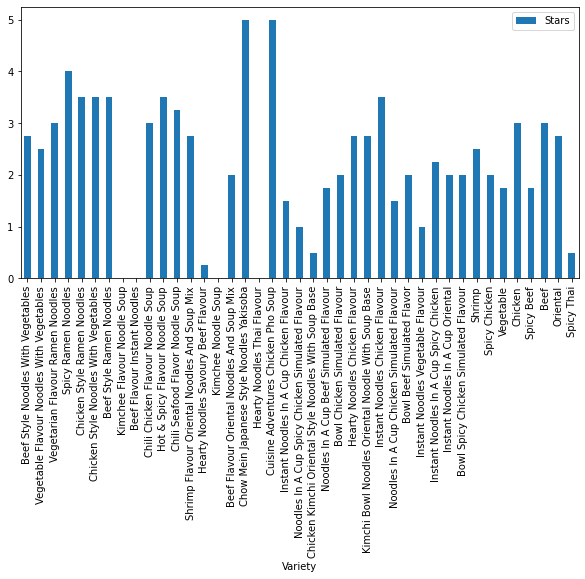

In [262]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Canada"].plot(kind= "bar")
df_rater.head()

In [ ]:
ramen_rater_AUS = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A", index_col="Country")
df_rater.head()


,Review #,Brand,Variety,Style,Country,Stars
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


In [ ]:
df_rater["Country"].value_counts()

Japan            381
United States    340
South Korea      326
Taiwan           229
Thailand         191
China            175
Malaysia         158
Hong Kong        144
Indonesia        141
Singapore        122
Vietnam          108
UK                69
Philippines       47
Canada            41
India             39
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Nigeria            2
Ghana              2
Phlippines         1
Name: Country, dtype: int64

In [ ]:
df_rater["Top Ten"].value_counts()

KeyError: 'Top Ten'

In [ ]:
tops = df_rater[[type(x)is str for x in df_rater["Top Ten"]]]
tops[["#1" in x for x in tops["Top Ten"]]]



,Review #,Brand,Variety,Style,Country,Stars,Top Ten
736,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
753,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
1200,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5,2015 #1
1229,1471,Mama,Instant Noodles Shrimp Creamy Tom Yum Flavour ...,Pack,Thailand,5,2013 #10
1398,1302,Mama,Instant Noodles Yentafo Tom Yum Mohfai Flavour,Pack,Thailand,5,2014 #10
1613,1087,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5,2014 #1
1708,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5,2013 #1
2092,608,Koka,Spicy Black Pepper,Pack,Singapore,5,2012 #10
2595,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5,2012 #1


In [ ]:
x = df_rater['Top Ten'] == "#1"
x


0       False
1       False
2       False
3       False
4       False
        ...  
2695    False
2696    False
2697    False
2698    False
2699    False
Name: Top Ten, Length: 2700, dtype: bool

In [ ]:
bars = df_rater['Variety']
bar_list = bars.to_list()

In [ ]:
#wordcloud plot
Text = df_rater['Variety']
Text.head()



Country
Taiwan                             Jhen Mian Tang Spicy Hot Noodle
Japan                                  Chicken Shio Wanton Noodles
Singapore        Cup Noodles Chilli Crab Flavour (More Crabtastic)
United States    Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...
United States                    Neoguri Spicy Seafood Noodle Soup
Name: Variety, dtype: object

In [ ]:
list_of_variety = Text.to_list()



In [ ]:
texts= list_of_variety[10]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviewed ramen flavours.".format(len(texts)))

There are 82856 words in the combination of all reviewed ramen flavours.


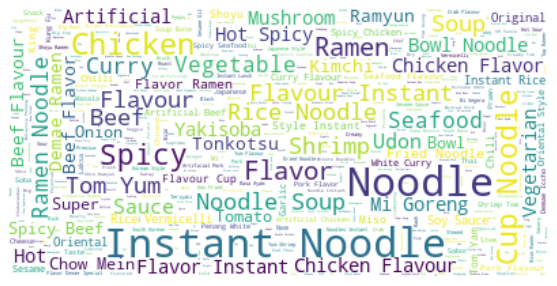

In [ ]:
wordcloud = WordCloud(background_color="white",margin=2, min_font_size= 2, max_font_size=30, max_words= 1000, min_word_length=0).generate(texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
bowl_mask = np.array(Image.open("istockphoto-874666510-612x612.jpg"))
bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_bowl_mask = np.ndarray((bowl_mask.shape[0], bowl_mask.shape[1]), np.int32)

for i in range (len(bowl_mask)):
    transformed_bowl_mask[i]= list(map(transform_format, bowl_mask[i]))

In [ ]:
transformed_bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

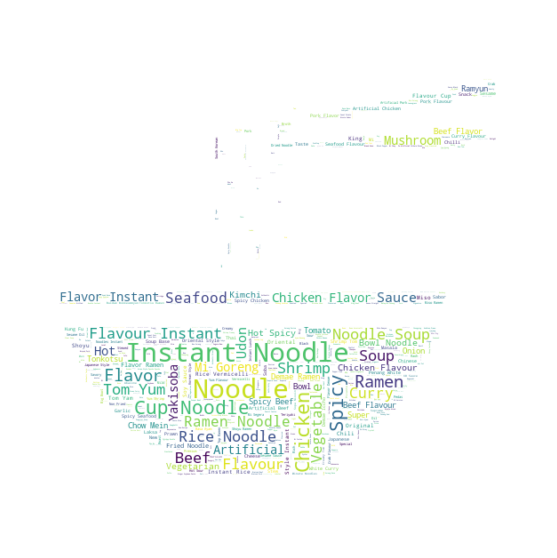

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 1, max_font_size=30, mask=transformed_bowl_mask)

wc.generate(texts)


wc.to_file("ramen.jpg")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [ ]:
noodle_mask = np.array(Image.open("images (3).png"))
noodle_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format (val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_noodle_mask = np.ndarray((noodle_mask.shape[0], noodle_mask.shape[1]), np.int32)

for i in range(len(noodle_mask)):
    transformed_noodle_mask[i] = list(map(transform_format, noodle_mask[i]))

In [ ]:
transformed_noodle_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

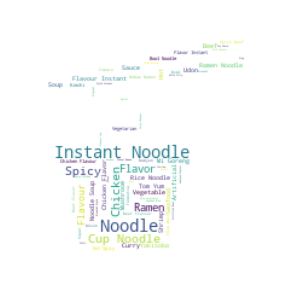

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 2, max_font_size=30, mask=transformed_noodle_mask, contour_color="red")

wc.generate(texts)

wc.to_file("images (1).png")

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [ ]:
df_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
df_demands.head()




,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Viet Nam,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [ ]:
df_demands.set_index("Countries/Region", inplace=True)


In [ ]:
df_demands.tail()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Finland,10.0,10.0,10,10,10
Switzerland,10.0,10.0,10,10,10
Argentina,10.0,10.0,10,10,4
Others,1070.0,1310.0,1010,860,800
Total,97520.0,100110.0,103620,106420,116560


In [ ]:
group_5 =df_demands.sample(3)
group_5.head()


,2016,2017,2018,2019,2020
Countries/Region,,,,,
Denmark,10.0,10.0,10,20,20
Nepal,1340.0,1480.0,1570,1640,1540
Philippines,3400.0,3750.0,3980,3850,4470


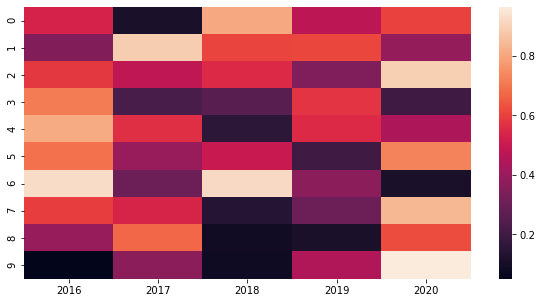

In [ ]:
# Create a dataset
df_demands = pd.DataFrame(np.random.random((10,5)), columns=["2016","2017","2018","2019","2020"])

#Changing the x axis to coutries



# Default heatmap
p1 = sns.heatmap(df_demands)
